In [1]:
import os
import torch

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

from fimodemix.data.dataloaders import FIMSDEpDataLoader
from fimodemix.pipelines.sdep_pipeline import FIMSDEpPipeline
from fimodemix.configs.config_classes.fim_sde_config import FIMSDEpModelParams
from fimodemix.models.fim_sdep import FIMSDEp,define_from_experiment_dir
from fimodemix.utils.helper import (
    nametuple_to_device,
    check_model_devices
)

from fimodemix.utils.plots.vector_fields import (
    select_process,
    plot_drift_diffussion
)

experiment_dir = r"C:\Users\cesar\Desktop\Projects\FoundationModels\fimodemix\results\1729141498"
#experiment_dir = r"C:\Users\cesar\Desktop\Projects\FoundationModels\fimodemix\results\1729173450"

experiment_files, model, dataloader = define_from_experiment_dir(experiment_dir)
pipeline = FIMSDEpPipeline(model)
output = pipeline(dataloader.one_batch)
databatch = dataloader.one_batch
print(output.path.shape)

c:\Users\cesar\anaconda3\envs\fimode\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\cesar\anaconda3\envs\fimode\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
c:\users\cesar\desktop\projects\foundationmodels\fimodemix\src\fimodemix\data\datasets.py:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickli

Max Hypercube Size: 1024
Max Dimension: 3
Max Num Steps: 129
Max Hypercube Size: 1024
Max Dimension: 3
Max Num Steps: 129
Max Hypercube Size: 1024
Max Dimension: 3
Max Num Steps: 129


Simulating steps:   0%|          | 0/128 [00:00<?, ?step/s]c:\Users\cesar\anaconda3\envs\fimode\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
Simulating steps: 100%|██████████| 128/128 [00:02<00:00, 54.34step/s] 

torch.Size([32, 129, 3])


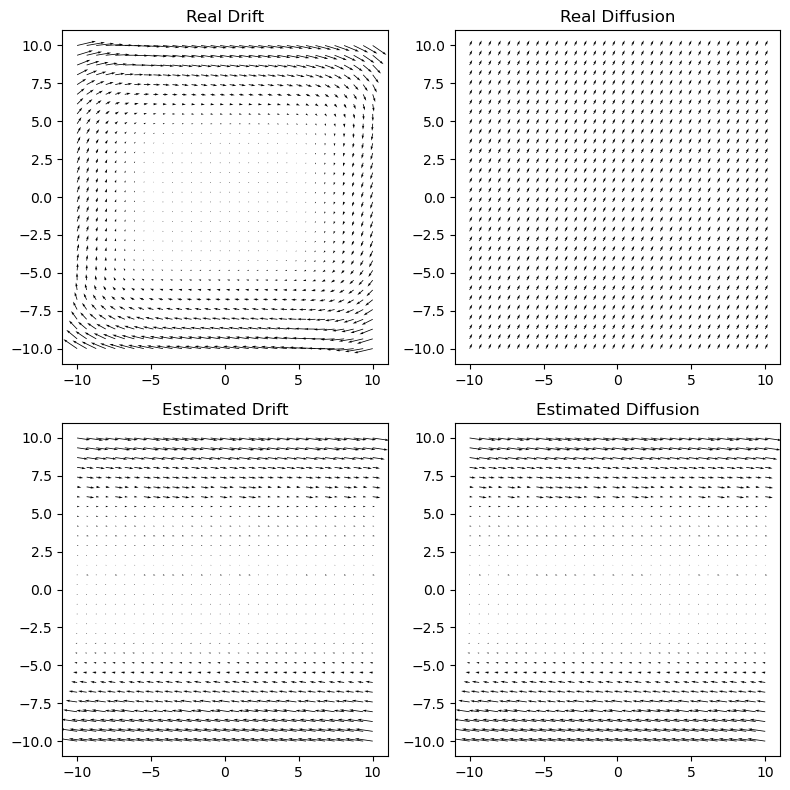

In [2]:
processes = select_process(output.drift_in_grid,output.drift_in_grid,databatch)
if processes is not None:
    xy_hypercube,real_drift,real_diffusion,estimated_drift,estimated_diffusion = processes
    # Generate and log the plot
    fig = plot_drift_diffussion(
        xy_hypercube=xy_hypercube,
        real_drift=real_drift,
        real_diffusion=real_diffusion,
        estimated_drift=estimated_drift,
        estimated_diffusion=estimated_diffusion,
        show=True
    )

In [3]:
test_databatch = next(dataloader.test_it.__iter__())
pipeline = FIMSDEpPipeline(model)
test_output = pipeline(test_databatch)

Simulating steps: 100%|██████████| 128/128 [00:00<00:00, 148.75step/s]


In [4]:
model = model.to(torch.device("cuda"))